In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("D:/BML/dataset.csv")
data

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
data[['experience', 'test_score']] = data[['experience', 'test_score']].fillna(data[['experience', 'test_score']].median())


In [14]:
data

,experience,test_score,interview_score,salary
0,6,8.0,9,50000
1,6,8.0,6,45000
2,1,6.0,7,60000
3,5,10.0,10,65000
4,2,9.0,6,70000
5,4,7.0,10,62000
6,3,8.0,7,72000
7,0,7.0,8,80000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       8 non-null      int32  
 1   test_score       8 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 352.0 bytes


In [19]:
data.describe()

,experience,test_score,interview_score,salary
count,8.000000,8.000000,8.000000,8.00000
mean,3.375000,7.875000,7.875000,63000.00000
std,2.263846,1.246423,1.642081,11501.55269
min,0.000000,6.000000,6.000000,45000.00000
25%,1.750000,7.000000,6.750000,57500.00000
50%,3.500000,8.000000,7.500000,63500.00000
75%,5.250000,8.250000,9.250000,70500.00000
max,6.000000,10.000000,10.000000,80000.00000


In [44]:
X = data.iloc[:,0:3].values


In [54]:
Y = data.salary.values


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=355)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
mlr = LinearRegression()
mlr.fit(x_train,y_train)


LinearRegression()

In [55]:
y_predict = mlr.predict([[10,9,10],[3,2,4],[5,7,6]])
y_predict

array([35916.66666667, 31916.66666667, 47791.66666667])

Text(0, 0.5, 'y_pred')

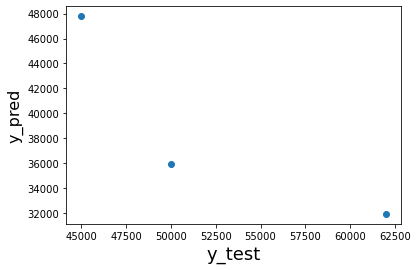

In [56]:
plt.scatter(y_test,y_predict)
plt.xlabel('y_test', fontsize=18) 
plt.ylabel('y_pred', fontsize=16)


In [49]:
meanAbErr = metrics.mean_absolute_error(y_test, y_predict)
meanSqErr = metrics.mean_squared_error(y_test, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('R squared: {:.2f}'.format(mlr.score(X,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 85.49
Mean Absolute Error: 2416.6666666666642
Mean Square Error: 7225694.444444454
Root Mean Square Error: 2688.0651860482203


In [50]:
print(mlr.score(x_test, y_test))

0.8580103711790391
